## Import Datasets

In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from IPython.display import display, clear_output
import random

%matplotlib inline  

# retrieve data collected by fans online
#     describing rolls made by Travis in The Adventure Zone, 
# specifically 3 sub-arcs of "Balance": 
#     Petals to the Metal, The Crystal Kingdom, and The Eleventh Hour

#rename first column (was index previously) to ID
df = pd.read_csv(r"TravisRollsDataset.csv")
df.columns = ["id"] + list(df.columns)[1:]
rand_weights = pd.read_csv(r"nerd_shit1.csv")
rand_weights.columns = ["id"] + list(rand_weights.columns)[1:]
df.head()

,id,season,episode,roll,mod,basis,type,adv,nat,adv_num,stat
0,2,3,1,13,0,wisdom,save,NaN,False,0,WIS
1,3,3,1,17,0,investigation,check,NaN,False,0,INT
2,4,3,1,4,2,dexterity,save,NaN,False,0,DEX
3,6,3,2,16,7,melee,attack,NaN,False,0,ATTACK
4,7,3,2,16,7,melee,attack,advantage,False,1,ATTACK


In [9]:
#subjectively categorize "important" rolls for Travis' character
# Magnus Burnsides is a barbarian warrior who succeeds by fighting
# We assume that fighting actions, or related actions are high 
# enough stakes to potentially cheat. Furthermore rolls at a 
# disadvantages are high enough stakes to potentially cheat. 
def assess_important(x):
    if x['adv']=="disadvantage" or x['stat'] =="ATTACK":
        return 1
    else:
        return 0
df['important'] = df.apply(assess_important, axis=1)
rand_weights['important'] = rand_weights.apply(assess_important, axis=1)

In [10]:
# If Travis were cheating, the outcome would be higher
#than outerwise expected rolls. Therefore we must determine
#what exactly is a high roll, since a cheating roll would only be high. 
#Related to that, more cheating would mean fewer low rolls. 
#In D&D combat, you do not fight against the median d20 roll, 
#you fight against your other. 
lowest_high = 12

df['rolled'] = pd.Categorical(df.roll.apply(lambda x: \
            "high" if x>=lowest_high else "low"), categories=["low", "high"], ordered=True)
rand_weights['rolled'] = pd.Categorical(rand_weights.roll.apply(lambda x: \
            "high" if x>=lowest_high else "low"), categories=["low", "high"], ordered=True)
df.head()

,id,season,episode,roll,mod,basis,type,adv,nat,adv_num,stat,important,rolled
0,2,3,1,13,0,wisdom,save,NaN,False,0,WIS,0,high
1,3,3,1,17,0,investigation,check,NaN,False,0,INT,0,high
2,4,3,1,4,2,dexterity,save,NaN,False,0,DEX,0,low
3,6,3,2,16,7,melee,attack,NaN,False,0,ATTACK,1,high
4,7,3,2,16,7,melee,attack,advantage,False,1,ATTACK,1,high


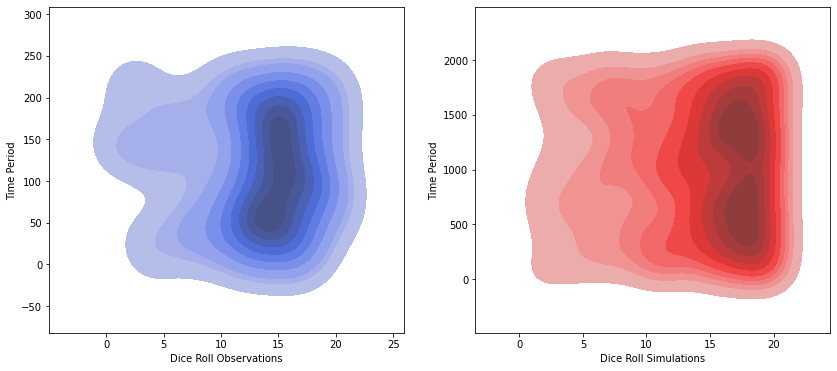

In [11]:
traviscol = 'royalblue'
simcol = 'firebrick'

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.kdeplot(data=df, x="roll", y="id", fill=True, ax=ax1, color = traviscol)
ax1.set(xlabel="Dice Roll Observations", ylabel = "Time Period")
sns.kdeplot(data=rand_weights, x="roll", y="id", fill=True, ax=ax2, color=simcol)
ax2.set(xlabel="Dice Roll Simulations", ylabel = "Time Period");

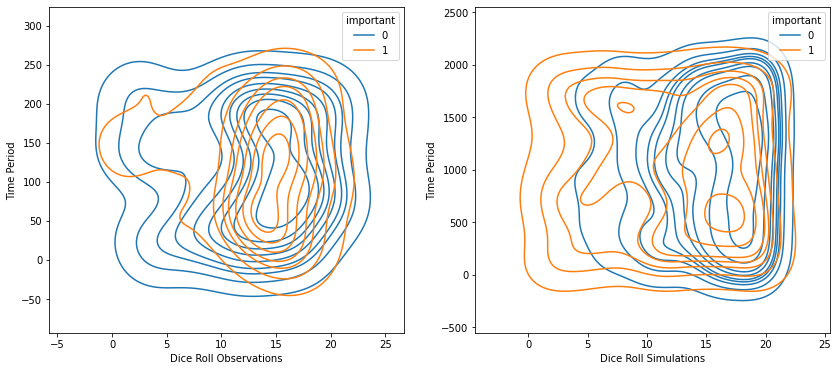

In [12]:
fig1, (ax11, ax12) = plt.subplots(1,2, figsize=(14,6))

sns.kdeplot(data=df, x="roll", y="id", hue="important", ax=ax11)
ax11.set(xlabel="Dice Roll Observations", ylabel = "Time Period")
sns.kdeplot(data=rand_weights, x="roll", y="id", hue="important", ax=ax12)
ax12.set(xlabel="Dice Roll Simulations", ylabel = "Time Period");

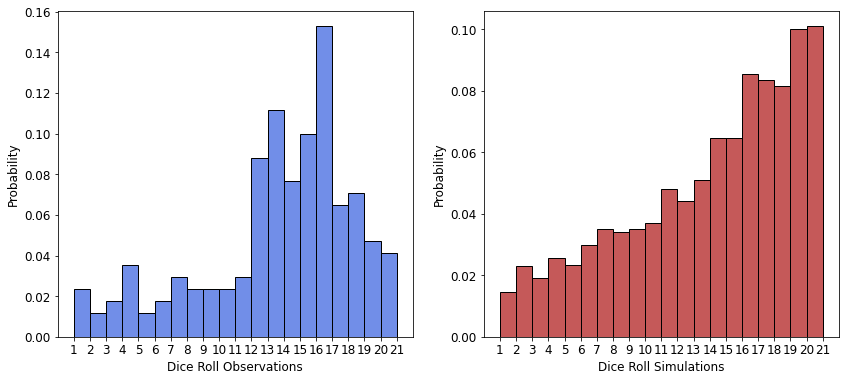

In [15]:
plt.rcParams.update({'font.size': 12})

fig2, (ax21, ax22) = plt.subplots(1,2, figsize=(14,6))

sns.histplot(data=df, x="roll", stat="probability", ax=ax21, 
    bins=np.histogram_bin_edges(df.roll, bins=list(range(1,22))),
    color=traviscol)
ax21.set(xlabel="Dice Roll Observations", ylabel = "Probability")
ax21.set(xticks=list(np.arange(1,22,1)))
sns.histplot(data=rand_weights, x="roll", stat="probability", ax=ax22, 
    bins=np.histogram_bin_edges(df.roll, bins=list(range(1,22))),
    color=simcol)
ax22.set(xlabel="Dice Roll Simulations", ylabel = "Probability")
ax22.set(xticks=list(np.arange(1,22,1)));

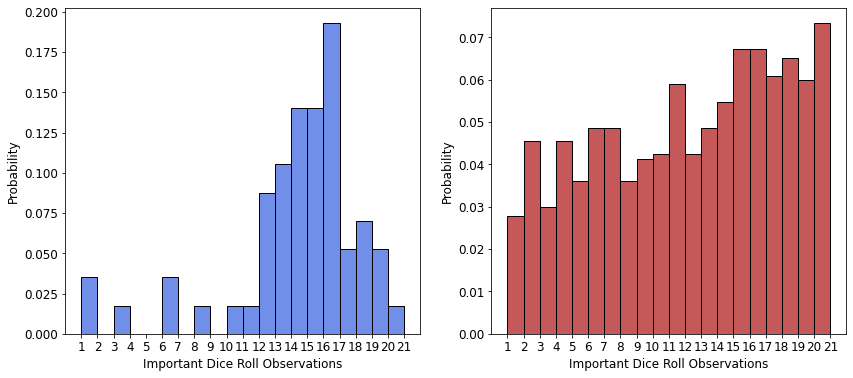

In [16]:
fig3, (ax31, ax32) = plt.subplots(1,2, figsize=(14,6))

sns.histplot(data=df.query("stat == 'ATTACK' or adv=='disadvantage'"), x="roll",
    stat="probability", ax=ax31, 
    bins=np.histogram_bin_edges(df.roll, bins=list(range(1,22))),
    color=traviscol)
ax31.set(xlabel="Important Dice Roll Observations", ylabel = "Probability")
ax31.set(xticks=list(np.arange(1,22,1)))
sns.histplot(data=rand_weights.query("stat == 'ATTACK' or adv=='disadvantage'"), x="roll",
    stat="probability", ax=ax32, 
    bins=np.histogram_bin_edges(rand_weights.roll, bins=list(range(1,22))),
    color=simcol)
ax32.set(xlabel="Important Dice Roll Observations", ylabel = "Probability")
ax32.set(xticks=list(np.arange(1,22,1)));

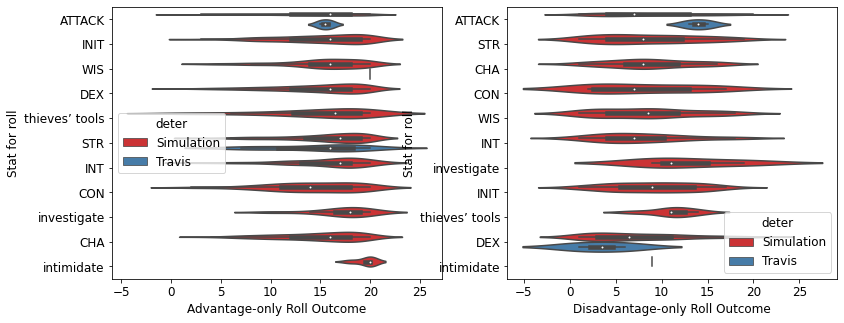

In [17]:
# merge the datasets
df['deter'] = 'Travis'
rand_weights['deter'] = 'Simulation'
total_data_rodeo = pd.concat([rand_weights, df], axis=0).reset_index()

fig5, (ax51, ax52) = plt.subplots(1,2, figsize=(13,5))

sns.violinplot(x="roll",y="stat",data=total_data_rodeo.query("adv=='advantage'"),hue='deter',palette='Set1', ax=ax51)
ax51.set(xlabel="Advantage-only Roll Outcome", ylabel = "Stat for roll")

sns.violinplot(x="roll",y="stat",data=total_data_rodeo.query("adv=='disadvantage'"),hue='deter',palette='Set1', ax=ax52)
ax52.set(xlabel="Disadvantage-only Roll Outcome", ylabel = "Stat for roll");

## A Bayesian Analysis to Update the Likelihood of Dice Outcomes Given Advantage

$k$ = a given die side outcome $k \in \{1, 2, …, 19, 20\}$

$n_{k}$ = observed count of instances of a die side outcome (rolled a 4,7,20...)

prior $= P(k) = \frac{k}{\sum k}$ (uninformed)

likelihood $= P(k | n_{k}) = 1 + \frac{n_i}{\sum n_i}$

posterior $= P(n_{k} | k) = \frac{P(k | n_{k}) * P(n_{k})}{\sum_1^k P(k | n_{k}) * P(n_{k})}$

In [46]:
advantages = pd.DataFrame(df.adv.value_counts()) #count instances by advantage label
advantages['pct'] = advantages.adv / sum(advantages.adv) #find pct of all values

advantages['rolled'] = ["high", "low"]
advantages['lbound'] = [lowest_high, 1]
advantages['ubound'] = [20, lowest_high-1]

advantages['outcome_options'] = advantages.ubound - advantages.lbound + 1
# weighted is slightly different, so bring over these lines of code from the weighted generation file
weighted_probs = [0.05]*20
# reduce weight on 5
weighted_probs[4] = weighted_probs[4]*0.5
# increase weight on 16
weighted_probs[15] = round(weighted_probs[15]*1.5, 3)
l1 = sum(weighted_probs[11:21])
l2 = round(sum(weighted_probs[0:11]), 3)

prior = [l1, l2]

advantages["prior"] = prior

#likelihood of advantage/disadvantage states given data
advantages['likelihood'] = 1 + advantages.pct #change in representation given adv/disadv

#posterior probability of roll outcome given advantage/disadvantage observations
advantages['posterior'] = (advantages.likelihood * advantages.prior) \
    / sum(advantages.likelihood * advantages.prior)

advantages['per_outcome'] = advantages.posterior / advantages.outcome_options

advantages

,adv,pct,rolled,lbound,ubound,outcome_options,prior,likelihood,posterior,per_outcome
advantage,15,0.789474,high,12,20,9,0.475,1.789474,0.572188,0.063576
disadvantage,4,0.210526,low,1,11,11,0.525,1.210526,0.427812,0.038892


In [47]:
#find the proportion of die roll outcomes in the dataset

#for Travis
numberline_rodeo = df[["roll", "rolled", "id"]].\
    groupby(["roll", "rolled"]).count().reset_index().dropna().copy()
numberline_rodeo['pct'] = numberline_rodeo.id / sum(numberline_rodeo.id)

#for simulated data
numberline_sim = rand_weights[["roll", "rolled", "id"]].\
    groupby(["roll", "rolled"]).count().reset_index().dropna().copy()
numberline_sim['pct'] = numberline_sim.id / sum(numberline_sim.id)

numberline_rodeo.head()

,roll,rolled,id,pct
0,1,low,4.0,0.023529
2,2,low,2.0,0.011765
4,3,low,3.0,0.017647
6,4,low,6.0,0.035294
8,5,low,2.0,0.011765


Based on our existing dataset, advantage and disadvantage are outside the control of the players, and we must assume the base rates of each as a given 

In [48]:
from scipy.stats import f_oneway

# TRAVIS OBSERVATIONS ONLY
#lookup the posterior values from advantage analysis
goat_rodeo = pd.merge(numberline_rodeo, 
                      advantages[["rolled", "per_outcome"]],
                      on="rolled", how="inner").copy()
goat_rodeo.columns = ["outcome", "range", "count", "observed_p", "expected_p"]

low_observed = goat_rodeo.query("range == 'low'").observed_p.to_numpy()
high_observed = goat_rodeo.query("range == 'high'").observed_p.to_numpy()
low_expected = goat_rodeo.query("range == 'low'").expected_p.to_numpy()
high_expected = goat_rodeo.query("range == 'high'").expected_p.to_numpy()

pd.DataFrame([list(f_oneway(low_observed, low_expected)), 
              list(f_oneway(high_observed, high_expected))],
            columns=["f_stat", "p_value"], index=["low", "high"])

,f_stat,p_value
low,54.896208,3.734379e-07
high,3.023906,1.012459e-01


In [49]:
# SIMULATED DATA ONLY
#lookup the posterior values from advantage analysis
goat_rodeo2 = pd.merge(numberline_sim, 
                      advantages[["rolled", "per_outcome"]],
                      on="rolled", how="inner").copy()
goat_rodeo2.columns = ["outcome", "range", "count", "observed_p", "expected_p"]

low_observed2 = goat_rodeo2.query("range == 'low'").observed_p.to_numpy()
high_observed2 = goat_rodeo2.query("range == 'high'").observed_p.to_numpy()
low_expected2 = goat_rodeo2.query("range == 'low'").expected_p.to_numpy()
high_expected2 = goat_rodeo2.query("range == 'high'").expected_p.to_numpy()

pd.DataFrame([list(f_oneway(low_observed2, low_expected2)), 
              list(f_oneway(high_observed2, high_expected2))],
            columns=["f_stat", "p_value"], index=["low", "high"])



,f_stat,p_value
low,10.674483,0.003856
high,2.889686,0.108502


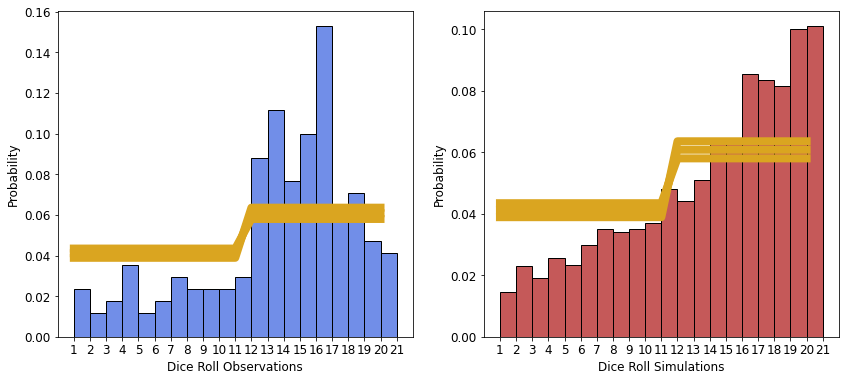

In [50]:
clear_output(wait = True)
ax21.plot(goat_rodeo.outcome, goat_rodeo.expected_p, 
          color='goldenrod', linestyle='solid', linewidth=8, 
          label='Expected Density')
ax22.plot(goat_rodeo2.outcome, goat_rodeo2.expected_p, 
          color='goldenrod', linestyle='solid', linewidth=8, 
          label='Expected Density')
display(fig2);

# NOTE THAT THE SCALE IS WAY DIFFERENT

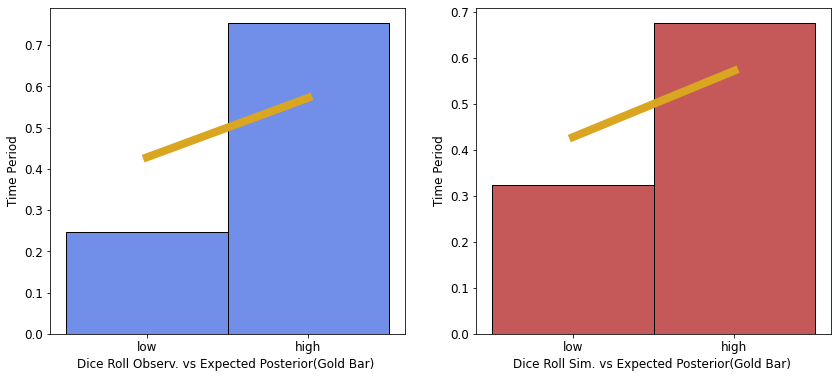

In [51]:
f4, (ax41, ax42) = plt.subplots(1,2, figsize=(14,6))

sns.histplot(data=df, x="rolled", stat="probability",ax=ax41, color=traviscol)
ax41.set(xlabel="Dice Roll Observ. vs Expected Posterior(Gold Bar) ", ylabel = "Time Period")
# ax41.set(xticks=list(np.arange(1,22,1)))
# ax1.set_title('Expected Versus Observed Probabilities of High and Low Rolls')
ax41.plot(advantages.rolled,
         advantages.posterior, color='goldenrod', 
          linestyle='solid', label='Expected Density', linewidth=8)

sns.histplot(data=rand_weights, x="rolled", stat="probability",ax=ax42, color=simcol)
ax42.set(xlabel="Dice Roll Sim. vs Expected Posterior(Gold Bar) ", ylabel = "Time Period")
# ax41.set(xticks=list(np.arange(1,22,1)))
# ax1.set_title('Expected Versus Observed Probabilities of High and Low Rolls')
ax42.plot(advantages.rolled,
         advantages.posterior, color='goldenrod', 
          linestyle='solid', label='Expected Density', linewidth=8);
#plt.text(x, y, "Gold bar", fontsize=12)

# SCALE IS SLIGHTLY DIFFERENT